In [0]:
import pandas as pd
import pandas_profiling as pp
import numpy as np
import scipy
import re
import string

import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer 
from nltk.stem import PorterStemmer
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
from textblob import TextBlob
import warnings
warnings.filterwarnings('ignore') 

from IPython.display import Image

import os

%matplotlib inline

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Womens Clothing E-Commerce Reviews.csv')

In [0]:
df.rename(columns={'Unnamed: 0':'Order_id'}, inplace=True )

In [0]:
df.shape #count of number of rows and columns

(23486, 11)

In [0]:
#Finding the missing value count and percentage of all columns
missing=df.isnull().sum()
columns=df.columns
percent_missing = df.isnull().sum()*100/len(df)
missing_value_data=pd.DataFrame({'missing_count':missing,'percent_missing':percent_missing})
missing_value_data

,missing_count,percent_missing
Order_id,0,0.000000
Clothing ID,0,0.000000
Age,0,0.000000
Title,3810,16.222430
Review Text,845,3.597888
Rating,0,0.000000
Recommended IND,0,0.000000
Positive Feedback Count,0,0.000000
Division Name,14,0.059610
Department Name,14,0.059610


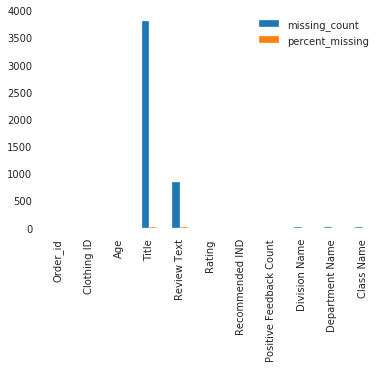

In [0]:
#Plotting missing value data
missing_value_data.plot(kind='bar')

In [0]:
#replace missing value 
df["Title"].fillna("No Title",inplace=True)
df["Review Text"].fillna("No Review",inplace=True)
df["Division Name"].fillna("No Division",inplace=True)
df["Department Name"].fillna("No Department",inplace=True)
df["Class Name"].fillna("No Class",inplace=True)

In [0]:
#Type of Data type of each column
df.dtypes

Order_id                    int64
Clothing ID                 int64
Age                         int64
Title                      object
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object

In [0]:
#Rename Column names
df=df.rename(columns = {"Review Text":"Review",
                        "Recommended IND":"Recommended",
                        "Clothing ID":"Clothing_ID",
                        "Positive Feedback Count":"Positive_Feedback_Count",
                        "Division Name":"Division_Name",
                        "Department Name":"Department_Name",
                        "Class Name":"Class_Name"})
df.head(5)

,Order_id,Clothing_ID,Age,Title,Review,Rating,Recommended,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name
0,0,767,33,No Title,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,No Title,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [0]:
#Statis of the dataset
df.describe()

,Order_id,Clothing_ID,Age,Rating,Recommended,Positive_Feedback_Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


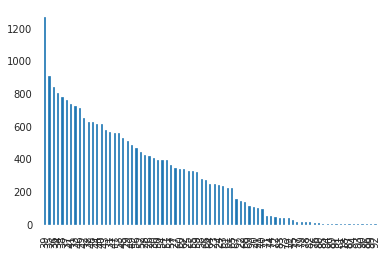

In [0]:
#Plot the age 
pd.value_counts(df['Age']).plot.bar()

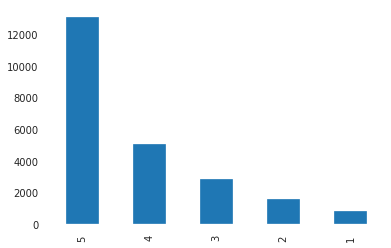

In [0]:
#plot for rating
pd.value_counts(df['Rating']).plot.bar()

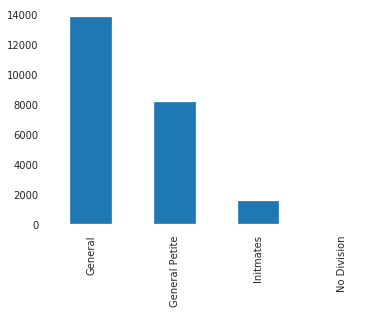

In [0]:
#plot division name
pd.value_counts(df['Division_Name']).plot.bar()

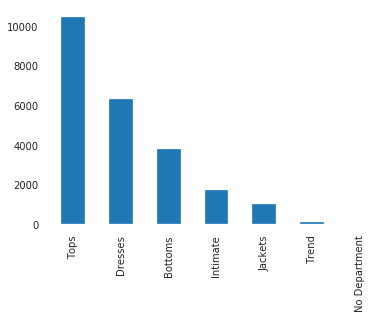

In [0]:
#plot Department Name
pd.value_counts(df['Department_Name']).plot.bar()

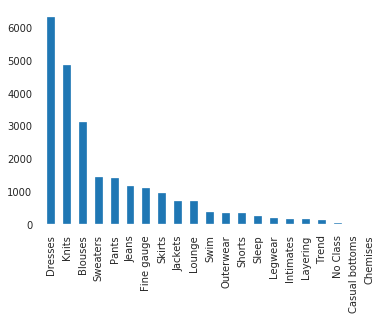

In [0]:
pd.value_counts(df['Class_Name']).plot.bar()

In [0]:
#Create column for Length of Title and Review
df['Title_length'] = df['Title'].apply(len)
df['Review_length'] = df['Review'].apply(len)
df.head(5)

,Order_id,Clothing_ID,Age,Title,Review,Rating,Recommended,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name,Title_length,Review_length
0,0,767,33,No Title,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,8,53
1,1,1080,34,No Title,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,8,303
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,23,500
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,16,124
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,16,192


In [0]:
#Text Polarity

#Create polarity column for Review

#Polarity  is the positive, negative and neutral expression in the sentence
# The polarity score is the float within the range[-1.0.1.0]

df['Review_Polarity'] = df['Review'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['Title_Polarity']=df['Title'].apply(lambda x: TextBlob(x).sentiment.polarity)
df.head(5)

,Order_id,Clothing_ID,Age,Title,Review,Rating,Recommended,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name,Title_length,Review_length,Review_Polarity,Title_Polarity
0,0,767,33,No Title,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,8,53,0.633333,0.0000
1,1,1080,34,No Title,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,8,303,0.339583,0.0000
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,23,500,0.073675,0.0625
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,16,124,0.550000,0.6250
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,16,192,0.512891,0.0000


In [0]:
#Output the file into csv
df.to_csv("/content/drive/My Drive/Colab Notebooks/Womens Clothing E-Commerce Reviews_Data_Manipulation.csv")

In [0]:
#!pip install pandas_profiling

In [0]:
#Pandas Profiling
pp.ProfileReport(df, minimal = True)

In [0]:
#Dataset for creating wordcloud
df_wc = df[['Title','Review','Recommended','Rating']]

In [0]:
#Text Cleaning for creating wordcloud
#Dropping Punctuation

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [0]:
def punctuation_removal(messy_str):
    clean_list = [char for char in messy_str if char not in string.punctuation]
    clean_str = ''.join(clean_list)
    return clean_str

In [0]:
df_wc['Title'] = df_wc['Title'].apply(punctuation_removal)
df_wc['Title'].head()

0                   No Title
1                   No Title
2    Some major design flaws
3            My favorite buy
4           Flattering shirt
Name: Title, dtype: object

In [0]:
df_wc['Review'] = df_wc['Review'].apply(punctuation_removal)
df_wc['Review'].head()

0    Absolutely wonderful  silky and sexy and comfo...
1    Love this dress  its sooo pretty  i happened t...
2    I had such high hopes for this dress and reall...
3    I love love love this jumpsuit its fun flirty ...
4    This shirt is very flattering to all due to th...
Name: Review, dtype: object

In [0]:
#count of exclamation mark
def count_exclamation_mark(string_text):
    count = 0
    for char in string_text:
        if char == '!':
            count += 1
    return count


In [0]:
df_wc['count_exc_review'] = df_wc['Review'].apply(count_exclamation_mark)
df_wc[['Review','count_exc_review']].head(5)

,Review,count_exc_review
0,Absolutely wonderful silky and sexy and comfo...,0
1,Love this dress its sooo pretty i happened t...,0
2,I had such high hopes for this dress and reall...,0
3,I love love love this jumpsuit its fun flirty ...,0
4,This shirt is very flattering to all due to th...,0


In [0]:
df_wc['count_exc_title'] = df_wc['Title'].apply(count_exclamation_mark)
df_wc[['Title','count_exc_title']].head(5)

,Title,count_exc_title
0,No Title,0
1,No Title,0
2,Some major design flaws,0
3,My favorite buy,0
4,Flattering shirt,0


In [0]:
#Part Speech filter

def adj_collector(review_string):
    new_string=[]
    review_string = word_tokenize(review_string)
    tup_word = nltk.pos_tag(review_string)
    for tup in tup_word:
        if 'VB' in tup[1] or tup[1]=='JJ':  #Verbs and Adjectives
            new_string.append(tup[0])  
    return ' '.join(new_string)

In [0]:
df_wc['Review'] = df_wc['Review'].apply(adj_collector)
df_wc['Review'].head(7)

0                                wonderful comfortable
1    Love happened find im did have ordered online ...
2    had such high wanted work i ordered small usua...
3                  love love fabulous wear i get great
4    is flattering due adjustable is perfect wear i...
5    love reese is petite am tall wear was is long ...
6    aded last see look i went am pale is gorgeous ...
Name: Review, dtype: object

In [0]:
df_wc['Title'] = df_wc['Title'].apply(adj_collector)
df_wc['Title'].head(7)

0              
1              
2         major
3      favorite
4    Flattering
5        petite
6              
Name: Title, dtype: object

In [0]:
#Stop Words
print(stopwords.words('english')[::12]) #check what does ::12 mean

['i', "you'd", 'hers', 'which', 'were', 'a', 'at', 'above', 'again', 'both', 'own', "don't", 'aren', 'haven', "shan't"]


In [0]:
stop = stopwords.words('english')
stop.append("i'm")

In [0]:
#Stopwords punctuation removal

stop_words = []

for item in stop: 
    new_item = punctuation_removal(item)
    stop_words.append(new_item) 
print(stop_words[::12])

['i', 'youd', 'hers', 'which', 'were', 'a', 'at', 'above', 'again', 'both', 'own', 'dont', 'aren', 'haven', 'shant']


In [0]:
#adding clothing stopwords

clothes_list =['dress', 'top','sweater','shirt',
               'skirt','material', 'white', 'black',
              'jeans', 'fabric', 'color','order', 'wear']


In [0]:
def stopwords_removal(messy_str):
    messy_str = word_tokenize(messy_str)
    return [word.lower() for word in messy_str 
            if word.lower() not in stop_words and word.lower() not in clothes_list ]

In [0]:
df_wc['Review'] = df_wc['Review'].apply(stopwords_removal)
df_wc['Review'].head()

0                             [wonderful, comfortable]
1    [love, happened, find, ordered, online, bc, bo...
2    [high, wanted, work, ordered, small, usual, fo...
3                   [love, love, fabulous, get, great]
4    [flattering, due, adjustable, perfect, pairs, ...
Name: Review, dtype: object

In [0]:
df_wc['Title'] = df_wc['Title'].apply(stopwords_removal)
df_wc['Title'].head()

0              []
1              []
2         [major]
3      [favorite]
4    [flattering]
Name: Title, dtype: object

In [0]:
#Remove all numbers

def drop_numbers(list_text):
    list_text_new = []
    for i in list_text:
        if not re.search('\d', i):
            list_text_new.append(i)
    return ' '.join(list_text_new)

In [0]:
df_wc['Review'] = df_wc['Review'].apply(drop_numbers)
df_wc['Review'].head()

0                                wonderful comfortable
1    love happened find ordered online bc bought lo...
2    high wanted work ordered small usual found sma...
3                         love love fabulous get great
4     flattering due adjustable perfect pairs cardigan
Name: Review, dtype: object

In [0]:
df_wc['Title'] = df_wc['Title'].apply(drop_numbers)
df_wc['Title'].head()

0              
1              
2         major
3      favorite
4    flattering
Name: Title, dtype: object

In [0]:
#Stemming

porter = PorterStemmer()

In [0]:
df_wc['Review'] = df_wc['Review'].apply(lambda x: x.split())
df_wc['Review'].head()

0                             [wonderful, comfortable]
1    [love, happened, find, ordered, online, bc, bo...
2    [high, wanted, work, ordered, small, usual, fo...
3                   [love, love, fabulous, get, great]
4    [flattering, due, adjustable, perfect, pairs, ...
Name: Review, dtype: object

In [0]:
df_wc['Title'] = df_wc['Title'].apply(lambda x: x.split())
df_wc['Title'].head()

0              []
1              []
2         [major]
3      [favorite]
4    [flattering]
Name: Title, dtype: object

In [0]:
def stem_update(text_list):
    text_list_new = []
    for word in text_list:
        word = porter.stem(word)
        text_list_new.append(word) 
    return text_list_new

In [0]:
df_wc['Review'] = df_wc['Review'].apply(stem_update)
df_wc['Review'].head()

0                                    [wonder, comfort]
1    [love, happen, find, order, onlin, bc, bought,...
2    [high, want, work, order, small, usual, found,...
3                      [love, love, fabul, get, great]
4      [flatter, due, adjust, perfect, pair, cardigan]
Name: Review, dtype: object

In [0]:
df_wc['Review'] = df_wc['Review'].apply(lambda x: ' '.join(x))
df_wc['Review'].head()

0                                       wonder comfort
1    love happen find order onlin bc bought love hi...
2    high want work order small usual found small s...
3                            love love fabul get great
4             flatter due adjust perfect pair cardigan
Name: Review, dtype: object

In [0]:
df_wc['Title'] = df_wc['Title'].apply(stem_update)
df_wc['Title'].head()

0           []
1           []
2      [major]
3    [favorit]
4    [flatter]
Name: Title, dtype: object

In [0]:
df_wc['Title'] = df_wc['Title'].apply(lambda x: ' '.join(x))
df_wc['Title'].head()

0           
1           
2      major
3    favorit
4    flatter
Name: Title, dtype: object

In [0]:
#Word Cloud - Repetition of Words based on Recommendatation

pos_df_recom = df_wc[df_wc.Recommended== 1]
neg_df_recom = df_wc[df_wc.Recommended== 0]
pos_df_recom.head(3)

,Title,Review,Recommended,Rating,count_exc_review,count_exc_title
0,,wonder comfort,1,4,0,0
1,,love happen find order onlin bc bought love hi...,1,5,0,0
3,favorit,love love fabul get great,1,5,0,0


In [0]:
pos_words =[]
neg_words =[]

for review in pos_df_recom.Review:
    pos_words.append(review) 
pos_words = ' '.join(pos_words)
pos_words[:40]

for review in neg_df_recom.Review:
    neg_words.append(review)
neg_words = ' '.join(neg_words)
neg_words[:400]

'high want work order small usual found small small zip reorder petit ok overal comfort fit bottom tight sever cheap imo major net c love rees petit tall long full overwhelm small shorten narrow take love work return run small run order fit tight cheap pull caus rip disappoint go say go style side purchas knew larg next imposs second look cheap awkward tight look describ return sure find exchang lo'

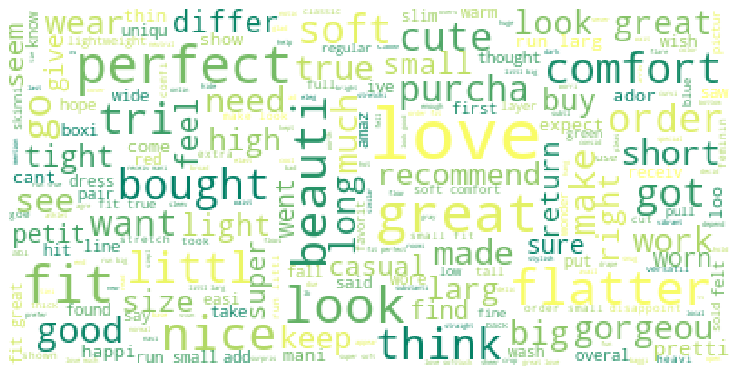

In [0]:
#Positive Reviews

wordcloud = WordCloud().generate(pos_words)

wordcloud = WordCloud(background_color="white",max_words=len(pos_words),\
                      max_font_size=40, relative_scaling=.5, colormap='summer').generate(pos_words)
plt.figure(figsize=(13,13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

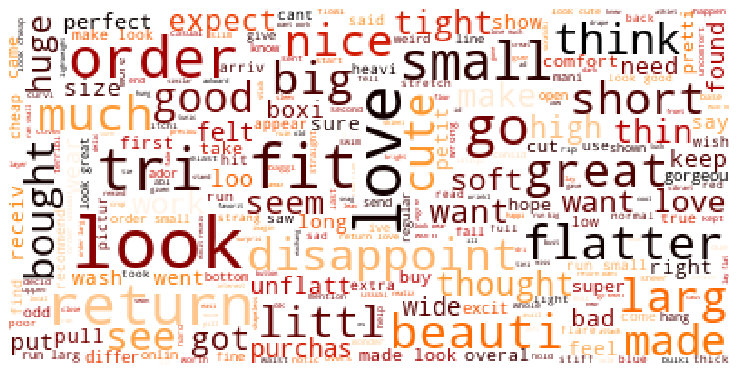

In [0]:
#Negative Reviews

wordcloud = WordCloud().generate(neg_words)

wordcloud = WordCloud(background_color="white",max_words=len(neg_words),\
                      max_font_size=40, relative_scaling=.5, colormap='gist_heat').generate(neg_words)
plt.figure(figsize=(13,13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


In [0]:
df_rat5 = df_wc[df_wc.Rating == 5]
df_rat4 = df_wc[df_wc.Rating == 4]
df_rat3 = df_wc[df_wc.Rating == 3]
df_rat2 = df_wc[df_wc.Rating == 2]
df_rat1 = df_wc[df_wc.Rating == 1]
df_rat5.head(3)

,Title,Review,Recommended,Rating,count_exc_review,count_exc_title
1,,love happen find order onlin bc bought love hi...,1,5,0,0
3,favorit,love love fabul get great,1,5,0,0
4,flatter,flatter due adjust perfect pair cardigan,1,5,0,0


In [0]:
pos_words5 =[]
pos_words4 =[]
pos_words3 =[]
pos_words2 =[]
pos_words1 =[]

for review in df_rat5.Review:
    pos_words5.append(review) 
pos_words5 = ' '.join(pos_words5)
pos_words5[:40]

for review in df_rat4.Review:
    pos_words4.append(review) 
pos_words4 = ' '.join(pos_words4)
pos_words4[:40]

for review in df_rat3.Review:
    pos_words3.append(review) 
pos_words3 = ' '.join(pos_words3)
pos_words3[:40]

for review in df_rat2.Review:
    pos_words2.append(review) 
pos_words2 = ' '.join(pos_words2)
pos_words2[:40]

for review in df_rat1.Review:
    pos_words1.append(review) 
pos_words1 = ' '.join(pos_words1)
pos_words1[:40]


'sewn small long huge itchi cut left itch'

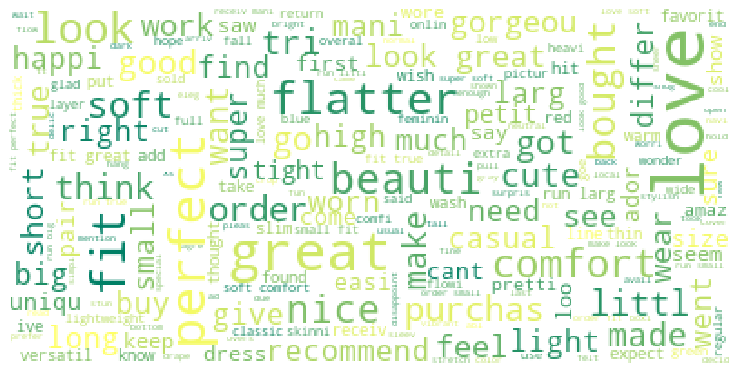

In [0]:
#Positive Rating 5

wordcloud = WordCloud().generate(pos_words5)

wordcloud = WordCloud(background_color="white",max_words=len(pos_words5),\
                      max_font_size=40, relative_scaling=.5, colormap='summer').generate(pos_words5)
plt.figure(figsize=(13,13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

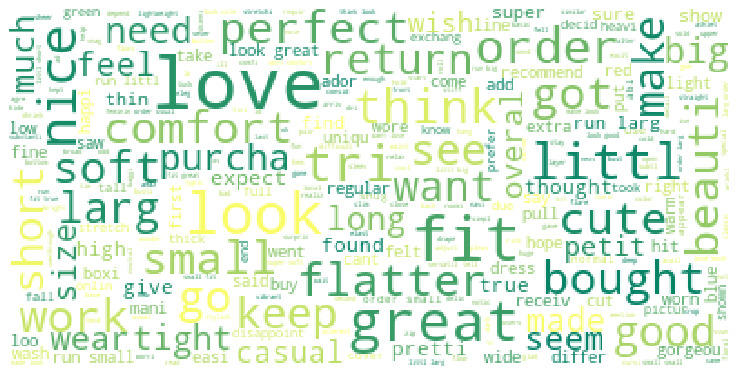

In [0]:
#Positive Rating 4 reviews

wordcloud = WordCloud(background_color="white",max_words=len(pos_words4),\
                      max_font_size=40, relative_scaling=.5, colormap='summer').generate(pos_words4)
plt.figure(figsize=(13,13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

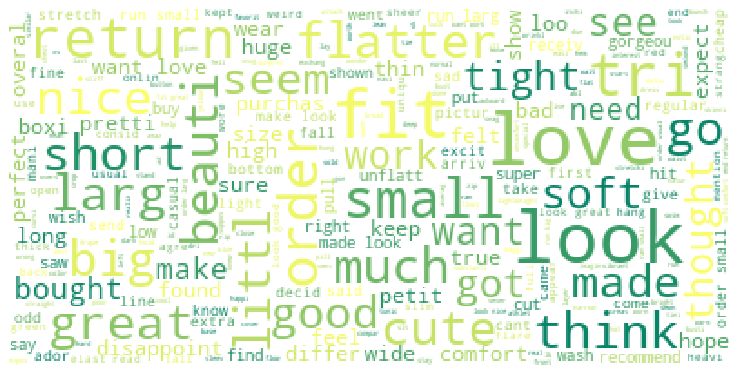

In [0]:
#Positive Rating 3
wordcloud = WordCloud(background_color="white",max_words=len(pos_words3),\
                      max_font_size=40, relative_scaling=.5, colormap='summer').generate(pos_words3)
plt.figure(figsize=(13,13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

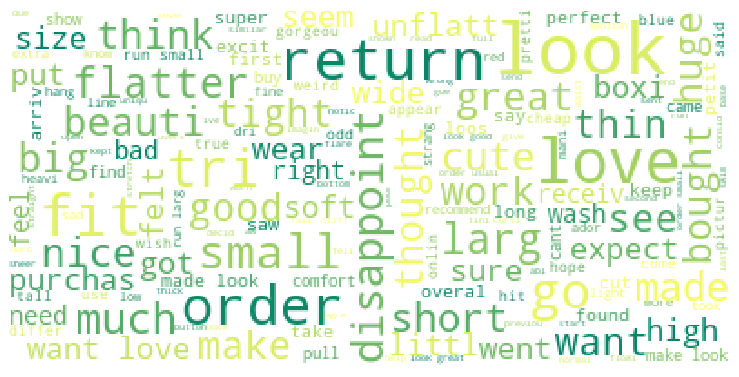

In [0]:
#Positive Rating 2
wordcloud = WordCloud(background_color="white",max_words=len(pos_words2),\
                      max_font_size=40, relative_scaling=.5, colormap='summer').generate(pos_words2)
plt.figure(figsize=(13,13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

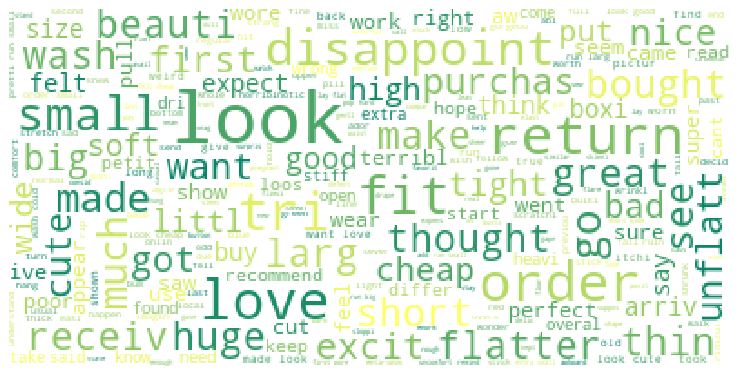

In [0]:
#Positive Rating 1
wordcloud = WordCloud(background_color="white",max_words=len(pos_words1),\
                      max_font_size=40, relative_scaling=.5, colormap='summer').generate(pos_words1)
plt.figure(figsize=(13,13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [0]:
neg_words5 =[]
neg_words4 =[]
neg_words3 =[]
neg_words2 =[]
neg_words1 =[]

for review in df_rat5.Review:
    neg_words5.append(review)
neg_words5 = ' '.join(neg_words5)
neg_words5[:400]

for review in df_rat4.Review:
    neg_words4.append(review)
neg_words4 = ' '.join(neg_words4)
neg_words4[:400]

for review in df_rat3.Review:
    neg_words3.append(review)
neg_words3 = ' '.join(neg_words3)
neg_words3[:400]

for review in df_rat2.Review:
    neg_words2.append(review)
neg_words2 = ' '.join(neg_words2)
neg_words2[:400]

for review in df_rat3.Review:
    neg_words1.append(review)
neg_words1 = ' '.join(neg_words1)
neg_words1[:400]

'high want work order small usual found small small zip reorder petit ok overal comfort fit bottom tight sever cheap imo major net c run small run order fit tight cheap pull caus rip disappoint go say go nice graze conserv relat small small run small big terribl delic got stuck nice larg hit open hem front make fluffi think imagin flatter averag look good littl fit littl high waist good think look '

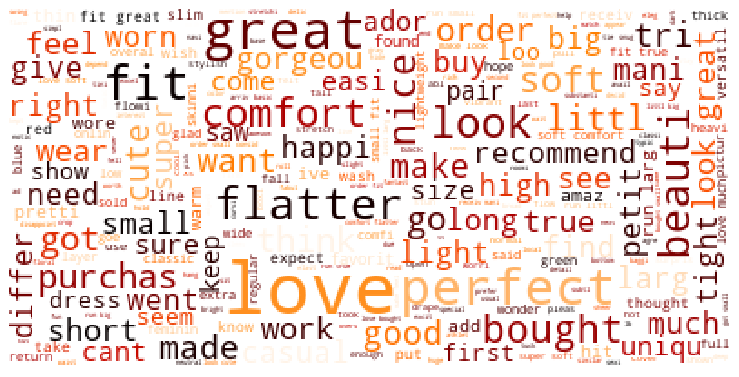

In [0]:
#Negative Rating 5 Reviews

wordcloud = WordCloud().generate(neg_words5)

wordcloud = WordCloud(background_color="white",max_words=len(neg_words5),\
                      max_font_size=40, relative_scaling=.5, colormap='gist_heat').generate(neg_words5)
plt.figure(figsize=(13,13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

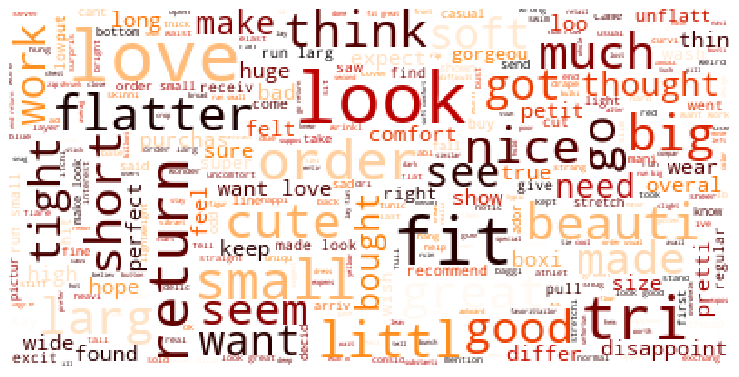

In [0]:
#Negative Rating 4 Reviews

wordcloud = WordCloud().generate(neg_words1)

wordcloud = WordCloud(background_color="white",max_words=len(neg_words1),\
                      max_font_size=40, relative_scaling=.5, colormap='gist_heat').generate(neg_words1)
plt.figure(figsize=(13,13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

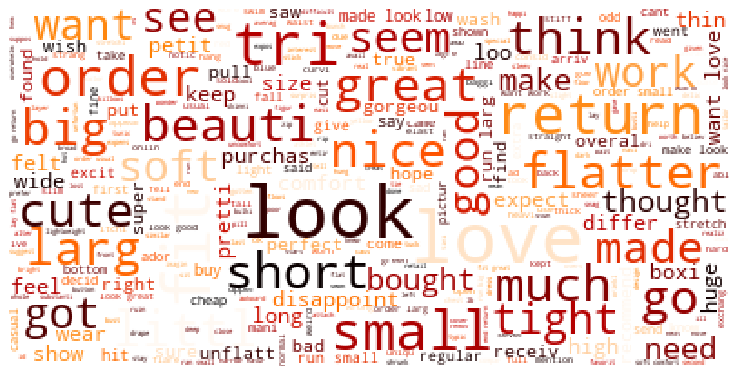

In [0]:
#Negative Rating 4 Reviews

wordcloud = WordCloud().generate(neg_words1)

wordcloud = WordCloud(background_color="white",max_words=len(neg_words1),\
                      max_font_size=40, relative_scaling=.5, colormap='gist_heat').generate(neg_words1)
plt.figure(figsize=(13,13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

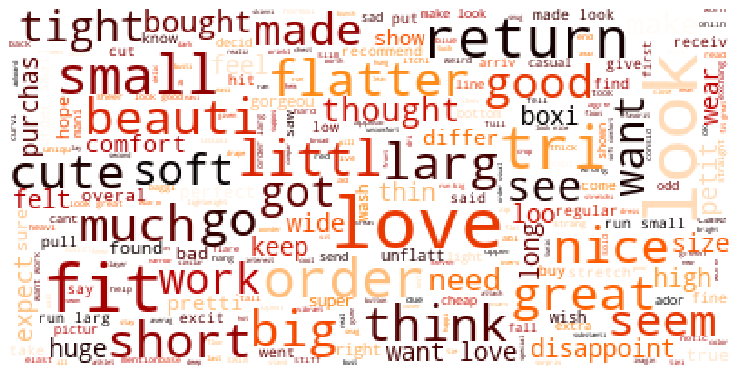

In [0]:
#Negative Rating 4 Reviews

wordcloud = WordCloud().generate(neg_words1)

wordcloud = WordCloud(background_color="white",max_words=len(neg_words1),\
                      max_font_size=40, relative_scaling=.5, colormap='gist_heat').generate(neg_words1)
plt.figure(figsize=(13,13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

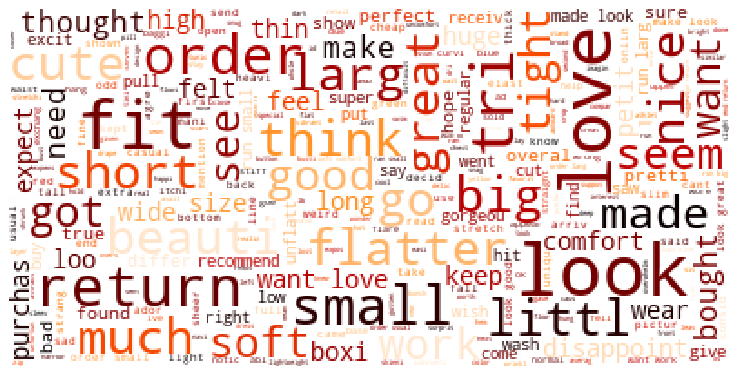

In [0]:
#Negative Rating 1 Reviews

wordcloud = WordCloud().generate(neg_words1)

wordcloud = WordCloud(background_color="white",max_words=len(neg_words1),\
                      max_font_size=40, relative_scaling=.5, colormap='gist_heat').generate(neg_words1)
plt.figure(figsize=(13,13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()